In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
# importing 2019 data I uploaded the excel sheet to the side bar of jupyter lab for convenience. I printed first five lines to check I had imported what i expected.
hel = pd.read_excel('2019 EBT.xlsx')
print(hel.head())

        Date simone breathone breathtwo simtwo Status result      County  \
0 2019-02-07      8        44        45     21     OK     36  Co.Wicklow   
1 2019-04-25      8        40        39     21     OK     32  Co.Wicklow   
2 2019-04-28      8         -         -      -   S.IT      -  Co.Wicklow   
3 2019-05-14      8       108       107     21     OK     88  Co.Wicklow   
4 2019-06-09      8        91        89     21     OK     73  Co.Wicklow   

       Time  Age Gender  
0  13:36:00   48   Male  
1  00:36:00   84   Male  
2  02:43:00   75   Male  
3  22:51:00   34   Male  
4  18:34:00   28   Male  


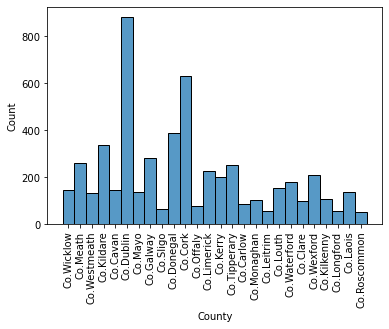

<Figure size 720x360 with 0 Axes>

In [4]:
# I did a quick hist plot for county to see where the most frequent arrests are made
sns.histplot(data=hel, x='County')
plt.xticks(rotation=90)
fig=plt.figure(figsize=(10,5))

In [5]:
# noticing in the head print that I had extra empty coluns in my dataframe I used the iloc to tidy up and get rid of columns as I will want to add more interesting columns as I go.
hel1 = hel.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,]]
print(hel1.head())

        Date simone breathone breathtwo simtwo Status result      County  \
0 2019-02-07      8        44        45     21     OK     36  Co.Wicklow   
1 2019-04-25      8        40        39     21     OK     32  Co.Wicklow   
2 2019-04-28      8         -         -      -   S.IT      -  Co.Wicklow   
3 2019-05-14      8       108       107     21     OK     88  Co.Wicklow   
4 2019-06-09      8        91        89     21     OK     73  Co.Wicklow   

       Time  Age Gender  
0  13:36:00   48   Male  
1  00:36:00   84   Male  
2  02:43:00   75   Male  
3  22:51:00   34   Male  
4  18:34:00   28   Male  


In [6]:
# The OK status indicates that the breath test cycle has gone to completion so to look at the result column the staus must be ok
helok=hel1[hel1.Status == 'OK']
print(helok.head())

        Date simone breathone breathtwo simtwo Status result      County  \
0 2019-02-07      8        44        45     21     OK     36  Co.Wicklow   
1 2019-04-25      8        40        39     21     OK     32  Co.Wicklow   
3 2019-05-14      8       108       107     21     OK     88  Co.Wicklow   
4 2019-06-09      8        91        89     21     OK     73  Co.Wicklow   
5 2019-06-29      8        64        62     21     OK     51  Co.Wicklow   

       Time  Age Gender  
0  13:36:00   48   Male  
1  00:36:00   84   Male  
3  22:51:00   34   Male  
4  18:34:00   28   Male  
5  00:50:00   50   Male  


In [8]:
status= hel['Status'].value_counts()

OK      4724
S.IT     437
S.RB     101
A.AI      31
A.DA      27
A.DT      18
A.MA      17
A.IS      10
T.XR       5
A.CN       1
T.IR       1
Name: Status, dtype: int64

In [10]:
hel['Age'].describe()

count    5372.000000
mean       39.916791
std        13.001109
min        15.000000
25%        30.000000
50%        38.000000
75%        48.000000
max        86.000000
Name: Age, dtype: float64

In [11]:
# comparing the decription of hel(all arreseted drivers brought to EBT ) with all drivers who successfully provided a breath test
helok['Age'].describe()

count    4724.000000
mean       39.315199
std        12.776551
min        15.000000
25%        30.000000
50%        38.000000
75%        48.000000
max        86.000000
Name: Age, dtype: float64

In [14]:
helok['result'].describe()

count     4723
unique     137
top          0
freq       281
Name: result, dtype: int64

In [13]:
# the maximum result reported for 2019 EBT alcohol was 146ug/100ml 
helok['result'].max()

146

In [15]:
# the profile of the driver who provided the highest breat h alcohol result is a male 42 year old!
helok.loc[helok['result'] == 146]

,Date,simone,breathone,breathtwo,simtwo,Status,result,County,Time,Age,Gender
2062,2019-02-18,8,184,177,20,OK,146,Co.Waterford,13:17:00,42,Male


In [16]:

helok.mean()

<ipython-input-16-537a840f34a8>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  helok.mean()


simone        8.116215
breathone    53.688400
breathtwo    53.187553
simtwo       21.158764
result       42.604065
Age          39.315199
dtype: float64

In [20]:
# the std will give me a quick quality check on the ethanol simulators standard within each test cycle.
helok['simone'].std()

0.32051657617967977

In [21]:
helok['simtwo'].std()

0.39393216332572256

In [22]:
helok.median()

<ipython-input-22-d8000bbcd644>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  helok.median()


simone        8.0
breathone    50.0
breathtwo    49.0
simtwo       21.0
result       40.0
Age          38.0
dtype: float64

In [23]:
# I added a column called day of the week using the date, this returns a 1- 7  1 being Monday
hel['Day']=hel['Date'].dt.weekday
print(hel.head())


        Date simone breathone breathtwo simtwo Status result      County  \
0 2019-02-07      8        44        45     21     OK     36  Co.Wicklow   
1 2019-04-25      8        40        39     21     OK     32  Co.Wicklow   
2 2019-04-28      8         -         -      -   S.IT      -  Co.Wicklow   
3 2019-05-14      8       108       107     21     OK     88  Co.Wicklow   
4 2019-06-09      8        91        89     21     OK     73  Co.Wicklow   

       Time  Age Gender  Day  
0  13:36:00   48   Male    3  
1  00:36:00   84   Male    3  
2  02:43:00   75   Male    6  
3  22:51:00   34   Male    1  
4  18:34:00   28   Male    6  


<AxesSubplot:xlabel='Day', ylabel='Count'>

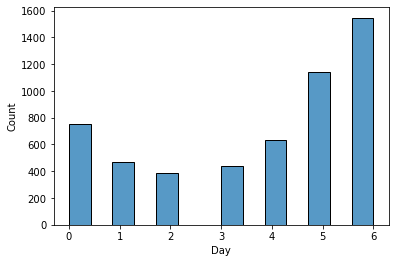

In [24]:
sns.histplot(data=hel, x='Day')

In [41]:
hel['Month']=hel['Date'].dt.month
print(hel.head())

        Date simone breathone breathtwo simtwo Status result      County  \
0 2019-02-07      8        44        45     21     OK     36  Co.Wicklow   
1 2019-04-25      8        40        39     21     OK     32  Co.Wicklow   
2 2019-04-28      8         -         -      -   S.IT      -  Co.Wicklow   
3 2019-05-14      8       108       107     21     OK     88  Co.Wicklow   
4 2019-06-09      8        91        89     21     OK     73  Co.Wicklow   

       Time  Age Gender  Day  Month  
0  13:36:00   48   Male    3      2  
1  00:36:00   84   Male    3      4  
2  02:43:00   75   Male    6      4  
3  22:51:00   34   Male    1      5  
4  18:34:00   28   Male    6      6  


In [49]:
hel.dropna()

,Date,simone,breathone,breathtwo,simtwo,Status,result,County,Time,Age,Gender,Day,Month
0,2019-02-07,8,44,45,21,OK,36,Co.Wicklow,13:36:00,48,Male,3,2
1,2019-04-25,8,40,39,21,OK,32,Co.Wicklow,00:36:00,84,Male,3,4
2,2019-04-28,8,-,-,-,S.IT,-,Co.Wicklow,02:43:00,75,Male,6,4
3,2019-05-14,8,108,107,21,OK,88,Co.Wicklow,22:51:00,34,Male,1,5
4,2019-06-09,8,91,89,21,OK,73,Co.Wicklow,18:34:00,28,Male,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5367,2019-10-20,8,100,102,20,OK,82,Co.Wicklow,02:03:00,50,Male,6,10
5368,2019-11-07,8,26,27,20,OK,21,Co.Wicklow,00:26:00,64,Female,3,11
5369,2019-11-08,8,31,28,21,OK,23,Co.Wicklow,21:07:00,33,Male,4,11
5370,2019-12-13,8,135,132,20,OK,108,Co.Wicklow,21:31:00,40,Male,4,12


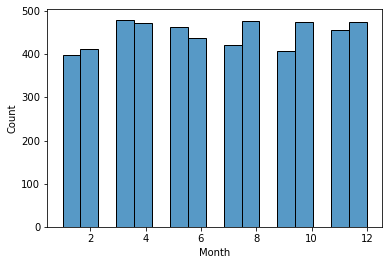

In [52]:
sns.histplot(data=hel, x='Month')
plt.show()

<AxesSubplot:xlabel='Day', ylabel='Count'>

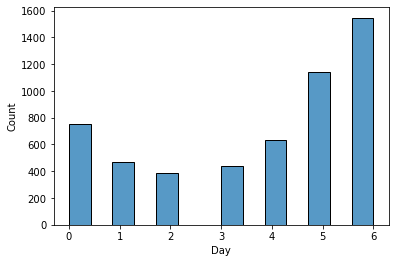

In [55]:
sns.histplot(data=hel, x='Day')

In [1]:
Leinster =[ "Co.Wicklow","Co.Dublin","Co.Meath"]
Province = hel['County'].isin(Leinster)
hel[Province]

NameError: name 'helok' is not defined

In [2]:
Leinster =[ "Co.Wicklow","Co.Dublin","Co.Meath"]
Province = hel['County'].isin(Leinster)
hel[Province]

NameError: name 'hel' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
# importing 2019 data I uploaded the excel sheet to the side bar of jupyter lab for convenience. I printed first five lines to check I had imported what i expected.
hel = pd.read_excel('2019 EBT.xlsx')
print(hel.head())

        Date simone breathone breathtwo simtwo Status result      County  \
0 2019-02-07      8        44        45     21     OK     36  Co.Wicklow   
1 2019-04-25      8        40        39     21     OK     32  Co.Wicklow   
2 2019-04-28      8         -         -      -   S.IT      -  Co.Wicklow   
3 2019-05-14      8       108       107     21     OK     88  Co.Wicklow   
4 2019-06-09      8        91        89     21     OK     73  Co.Wicklow   

       Time  Age Gender  
0  13:36:00   48   Male  
1  00:36:00   84   Male  
2  02:43:00   75   Male  
3  22:51:00   34   Male  
4  18:34:00   28   Male  


In [4]:
Leinster =[ "Co.Wicklow","Co.Dublin","Co.Meath"]
Province = hel['County'].isin(Leinster)
hel[Province]

,Date,simone,breathone,breathtwo,simtwo,Status,result,County,Time,Age,Gender
0,2019-02-07,8,44,45,21,OK,36,Co.Wicklow,13:36:00,48,Male
1,2019-04-25,8,40,39,21,OK,32,Co.Wicklow,00:36:00,84,Male
2,2019-04-28,8,-,-,-,S.IT,-,Co.Wicklow,02:43:00,75,Male
3,2019-05-14,8,108,107,21,OK,88,Co.Wicklow,22:51:00,34,Male
4,2019-06-09,8,91,89,21,OK,73,Co.Wicklow,18:34:00,28,Male
...,...,...,...,...,...,...,...,...,...,...,...
5367,2019-10-20,8,100,102,20,OK,82,Co.Wicklow,02:03:00,50,Male
5368,2019-11-07,8,26,27,20,OK,21,Co.Wicklow,00:26:00,64,Female
5369,2019-11-08,8,31,28,21,OK,23,Co.Wicklow,21:07:00,33,Male
5370,2019-12-13,8,135,132,20,OK,108,Co.Wicklow,21:31:00,40,Male


In [5]:
Leinster =[ "Co.Wicklow","Co.Dublin","Co.Meath","Co.Westmeath","Co.Louth"]
Province = hel['County'].isin(Leinster)
 len=hel[Province]

,Date,simone,breathone,breathtwo,simtwo,Status,result,County,Time,Age,Gender
0,2019-02-07,8,44,45,21,OK,36,Co.Wicklow,13:36:00,48,Male
1,2019-04-25,8,40,39,21,OK,32,Co.Wicklow,00:36:00,84,Male
2,2019-04-28,8,-,-,-,S.IT,-,Co.Wicklow,02:43:00,75,Male
3,2019-05-14,8,108,107,21,OK,88,Co.Wicklow,22:51:00,34,Male
4,2019-06-09,8,91,89,21,OK,73,Co.Wicklow,18:34:00,28,Male
...,...,...,...,...,...,...,...,...,...,...,...
5367,2019-10-20,8,100,102,20,OK,82,Co.Wicklow,02:03:00,50,Male
5368,2019-11-07,8,26,27,20,OK,21,Co.Wicklow,00:26:00,64,Female
5369,2019-11-08,8,31,28,21,OK,23,Co.Wicklow,21:07:00,33,Male
5370,2019-12-13,8,135,132,20,OK,108,Co.Wicklow,21:31:00,40,Male


In [7]:
Leinster =[ "Co.Wicklow","Co.Dublin","Co.Meath","Co.Westmeath","Co.Louth"]
Province = hel['County'].isin(Leinster)
len=hel[Province]
print(len.head())

IndentationError: unexpected indent (<ipython-input-7-ceb8314a8246>, line 3)

In [8]:
Leinster =[ "Co.Wicklow","Co.Dublin","Co.Meath","Co.Westmeath","Co.Louth"]
Province = hel['County'].isin(Leinster)
len=hel[Province]
print(len.head())

        Date simone breathone breathtwo simtwo Status result      County  \
0 2019-02-07      8        44        45     21     OK     36  Co.Wicklow   
1 2019-04-25      8        40        39     21     OK     32  Co.Wicklow   
2 2019-04-28      8         -         -      -   S.IT      -  Co.Wicklow   
3 2019-05-14      8       108       107     21     OK     88  Co.Wicklow   
4 2019-06-09      8        91        89     21     OK     73  Co.Wicklow   

       Time  Age Gender  
0  13:36:00   48   Male  
1  00:36:00   84   Male  
2  02:43:00   75   Male  
3  22:51:00   34   Male  
4  18:34:00   28   Male  


<AxesSubplot:xlabel='Gender', ylabel='Count'>

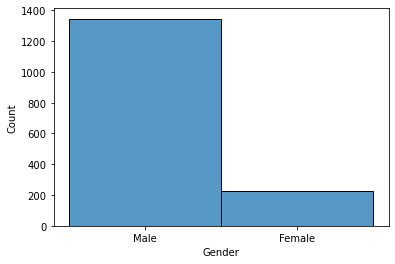

In [9]:
sns.histplot(data=len, x='Gender')

<AxesSubplot:xlabel='Age', ylabel='Count'>

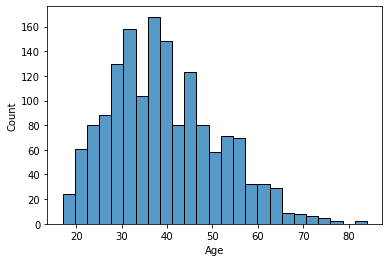

In [12]:
sns.histplot(data=len, x='Age')

In [1]:
len['Month']=len['Date'].dt.month.name
print(hel.head())

NameError: name 'hel' is not defined

In [2]:
len['Month']=len['Date'].dt.month.name
print(len.head())

TypeError: 'builtin_function_or_method' object is not subscriptable